Bản tiếng Việt - Tuấn. OK thiếu 1 thư viện

In [1]:
# 1. Import các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [2]:
# 2. Load dữ liệu từ dataset của mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)


(50000, 28, 28)


In [3]:
# 3. Reshape lại dữ liệu cho đúng kích thước keras yêu cầu
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [4]:
print(X_train.shape)

(50000, 28, 28, 1)


In [5]:
# 4. One hot encoding label (Y); tạo ra ma trận cột, vị trí của số 1 chỉ cho dữ liệu
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu ban đầu có dạng ', y_train[0])
print('Dữ liệu sau khi one-hot encoding ',Y_train[0])

Dữ liệu ban đầu có dạng  5
Dữ liệu sau khi one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
# 5. Định nghĩa mô hình
model = Sequential()
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# Dùng hàm sigmoid làm hàm activation và chỉ rõ input_shape cho layer
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))
# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())
# Thêm Fully Connected layer với 128 nodes và dòng hàm sigmoid làm activation
model.add(Dense(128, activation='sigmoid'))
# Output layer với 10 node và dùng softmax function để chuyển sang vector xác suất
model.add(Dense(10, activation='softmax'))

In [7]:
# 6. Compile model, chỉ rõ hàm Loss_function, phương thức tối ưu được sử dụng
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])


In [8]:
# 7. Train model
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
batch_size=32, epochs=10, verbose=1)


Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1562/1563 [============================>.] - ETA: 0s - loss: 0.2671 - accuracy: 0.9267WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000022123B69158> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=1

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Giá trị dự báo:  0
Giá trị dự báo:  0
Giá trị dự báo:  0
Giá trị dự báo:  0
Giá trị dự báo:  0


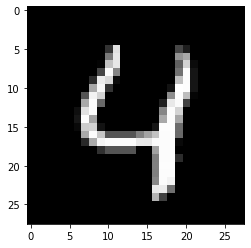

In [9]:
# 9. Đánh giá model với dữ liệu test set
#score = model.evaluate(X_test, Y_test, verbose=0)
#print(score)
# 10. Thử lại 1 ảnh
for i in range(5):
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    y_predict = model.predict(X_test[13].reshape(1,28,28,1))
    print('Giá trị dự báo: ', np.argmax(y_predict))
    

In [17]:
model.save("modelCNN_digit.h5")


In [22]:
from keras.models import load_model


In [29]:
import keras
model1= keras.models.load_model("modelCNN_digit.h5")
#model1= keras.models.load_model('model.h5')


[0.03380880504846573, 0.989799976348877]
Giá trị dự báo:  6


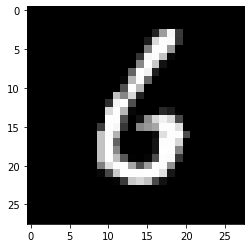

In [12]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)
# 10. Thử lại 1 ảnh
plt.imshow(X_test[50].reshape(28,28), cmap='gray')
y_predict = model.predict(X_test[50].reshape(1,28,28,1))
print('Giá trị dự báo: ', np.argmax(y_predict))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[0.03380880504846573, 0.989799976348877]
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the 

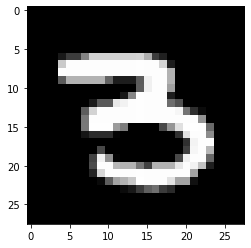

In [30]:
score = model1.evaluate(X_test, Y_test, verbose=0)
print(score)
# 10. Thử lại 1 ảnh
plt.imshow(X_test[51].reshape(28,28), cmap='gray')
y_predict = model1.predict(X_test[51].reshape(1,28,28,1))
print('Giá trị dự báo: ', np.argmax(y_predict))